Note: 1 point is out of plotting region in sector 'c', track '1'.

Note: 2 points are out of plotting region in sector 'd', track '1'.

Note: 8 points are out of plotting region in sector 'e', track '1'.

Note: 1 point is out of plotting region in sector 'f', track '1'.

Note: 2 points are out of plotting region in sector 'c', track '1'.

Note: 2 points are out of plotting region in sector 'd', track '1'.

Note: 2 points are out of plotting region in sector 'd', track '1'.

Note: 2 points are out of plotting region in sector 'e', track '1'.

Note: 2 points are out of plotting region in sector 'e', track '1'.

Note: 2 points are out of plotting region in sector 'e', track '1'.

Note: 2 points are out of plotting region in sector 'e', track '1'.

Note: 2 points are out of plotting region in sector 'e', track '1'.

Note: 2 points are out of plotting region in sector 'e', track '1'.

Note: 2 points are out of plotting region in sector 'e', track '1'.

Note: 2 points are out of plotting reg

null device 
          1

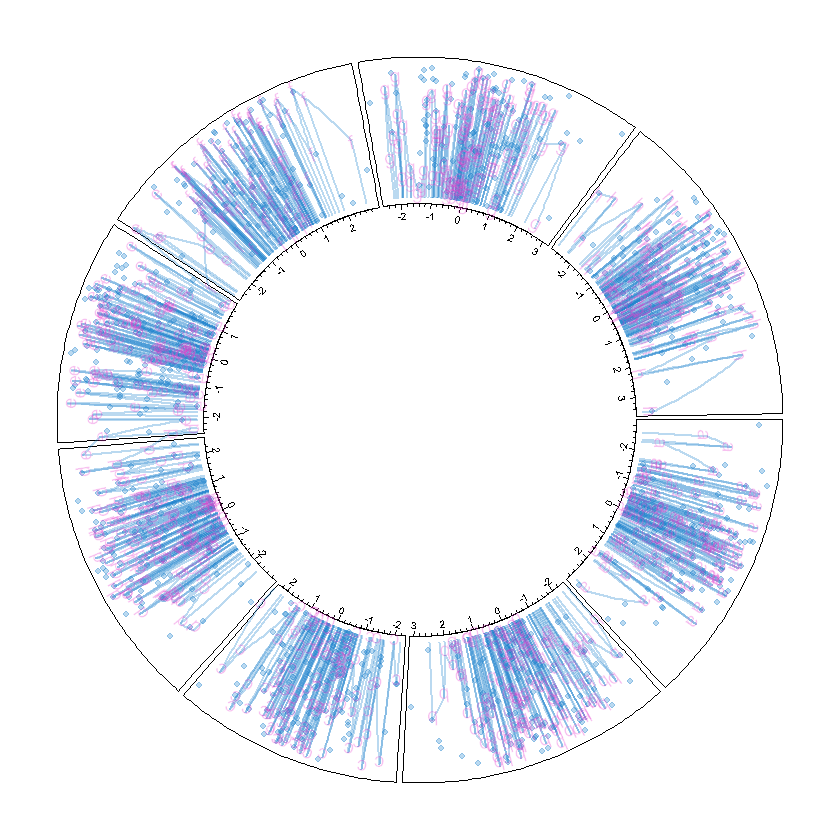

In [2]:
# Load library
library(circlize)
 
# Create data
data = data.frame(
    factor = sample(letters[1:8], 1000, replace = TRUE),
    x = rnorm(1000), 
    y = runif(1000)
    )
 
# General parameters
circos.par("track.height" = 0.4)
 
# Initialize chart
circos.initialize(factors = data$factor, x = data$x )
 
# Build the regions. 
circos.trackPlotRegion(factors = data$factor, y=data$y, panel.fun = function(x, y) {
    circos.axis(labels.cex=0.5, labels.font=1, lwd=0.8, h="bottom", direction="inside")
    })
 
 
# ----- Chose a type ---- #
 
 
# 1: scatter plot
circos.trackPoints(data$factor, data$x, data$y, col = rgb(0.1,0.5,0.8,0.3), pch=20)
 
# 2: lines
circos.trackLines(data$factor, data$x[order(data$x)], data$y[order(data$x)], col = rgb(0.1,0.5,0.8,0.3), lwd=2)
 
# 3: abline (vertical lines)
circos.trackLines(data$factor, data$x[order(data$x)], data$y[order(data$x)], col = rgb(0.1,0.5,0.8,0.3), lwd=2, type="h")
 
# 4: text
circos.trackText(data$factor, data$x[order(data$x)], data$y[order(data$x)], labels=data$factor, col = rgb(0.9,0.2,0.8,0.3), cex=1)
dev.off()

In [16]:
options(jupyter.plot_mimetypes = "image/svg+xml") 

#Create data
name=c(3,10,10,3,6,7,8,3,6,1,2,2,6,10,2,3,3,10,4,5,9,10)
feature=paste("feature ", c(1,1,2,2,2,2,2,3,3,3,3,3,3,3,4,4,4,4,5,5,5,5) , sep="")
dat <- data.frame(name,feature)
dat <- with(dat, table(name, feature))
 
# Charge the circlize library
library(circlize)
 
# Make the circular plot


svg(filename="./chordDiagram.svg")
chordDiagram(as.data.frame(dat), transparency = 0.5)
dev.off()

png 
  2

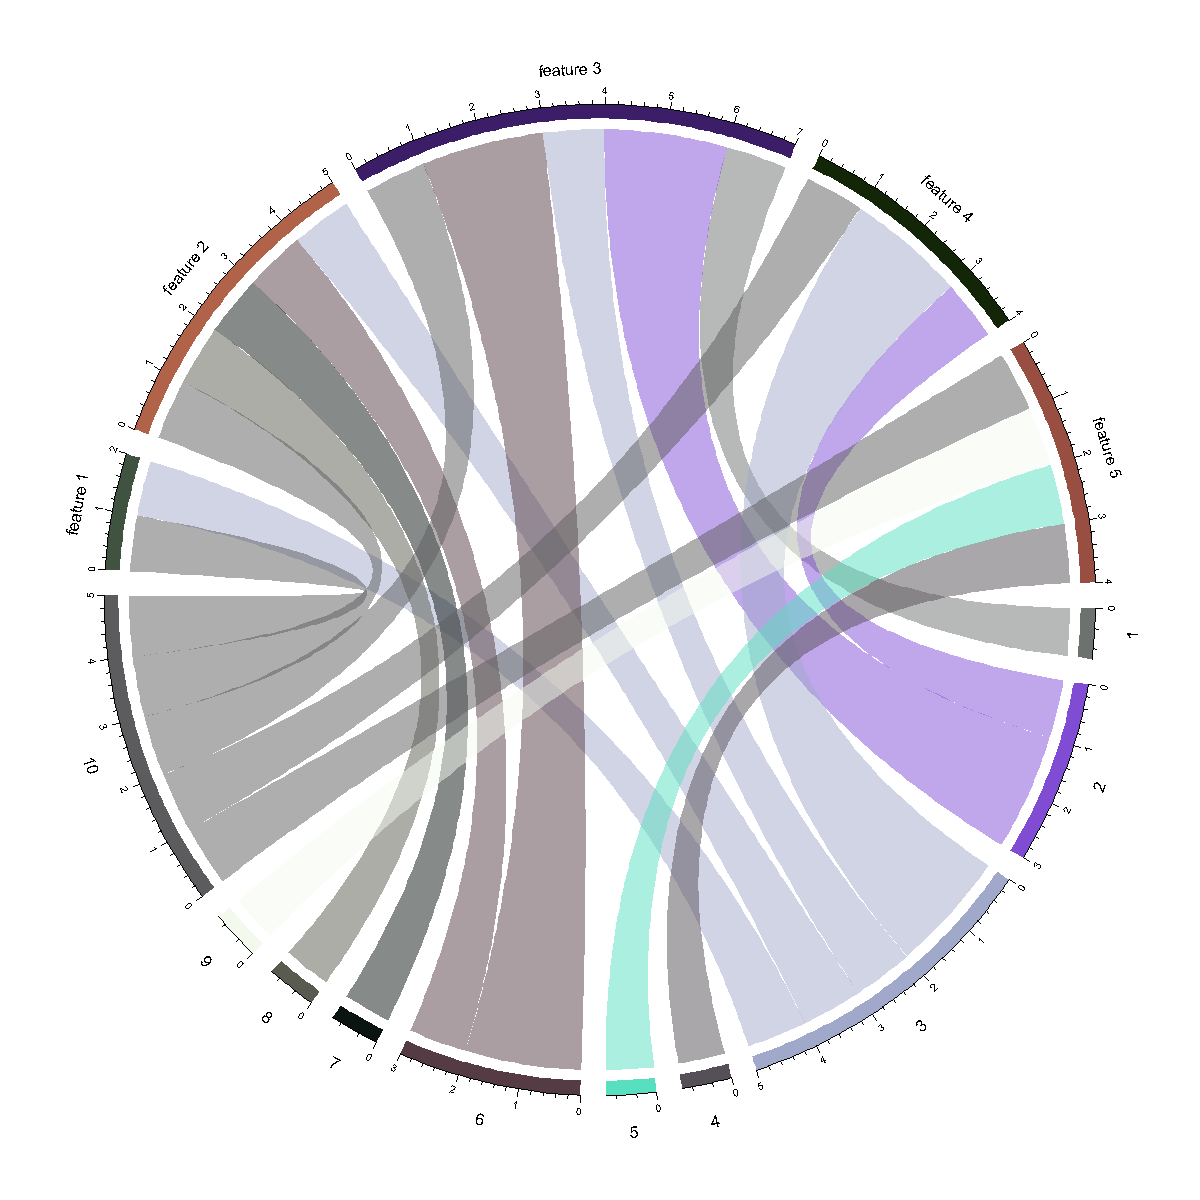

In [18]:
options(jupyter.plot_mimetypes = "image/png") 
chordDiagram(as.data.frame(dat), transparency = 0.5)

In [19]:
# 5: histogram
circos.initialize(factors = data$factor, x = data$x )
circos.trackPlotRegion(factors = data$factor, panel.fun = function(x, y) {
    circos.axis(labels.cex=0.5, labels.font=1, lwd=4)
    })
circos.trackHist(data$factor, data$x, bg.col = "grey78", col = rgb(0.1,0.5,0.8,0.3))

ERROR: Error in circos.initialize(factors = data$factor, x = data$x): You should specify either `x` or `xlim`.


ERROR: Error in check.track.position(track.index, track.start, track.height): not enough space for cells at track index '3'.



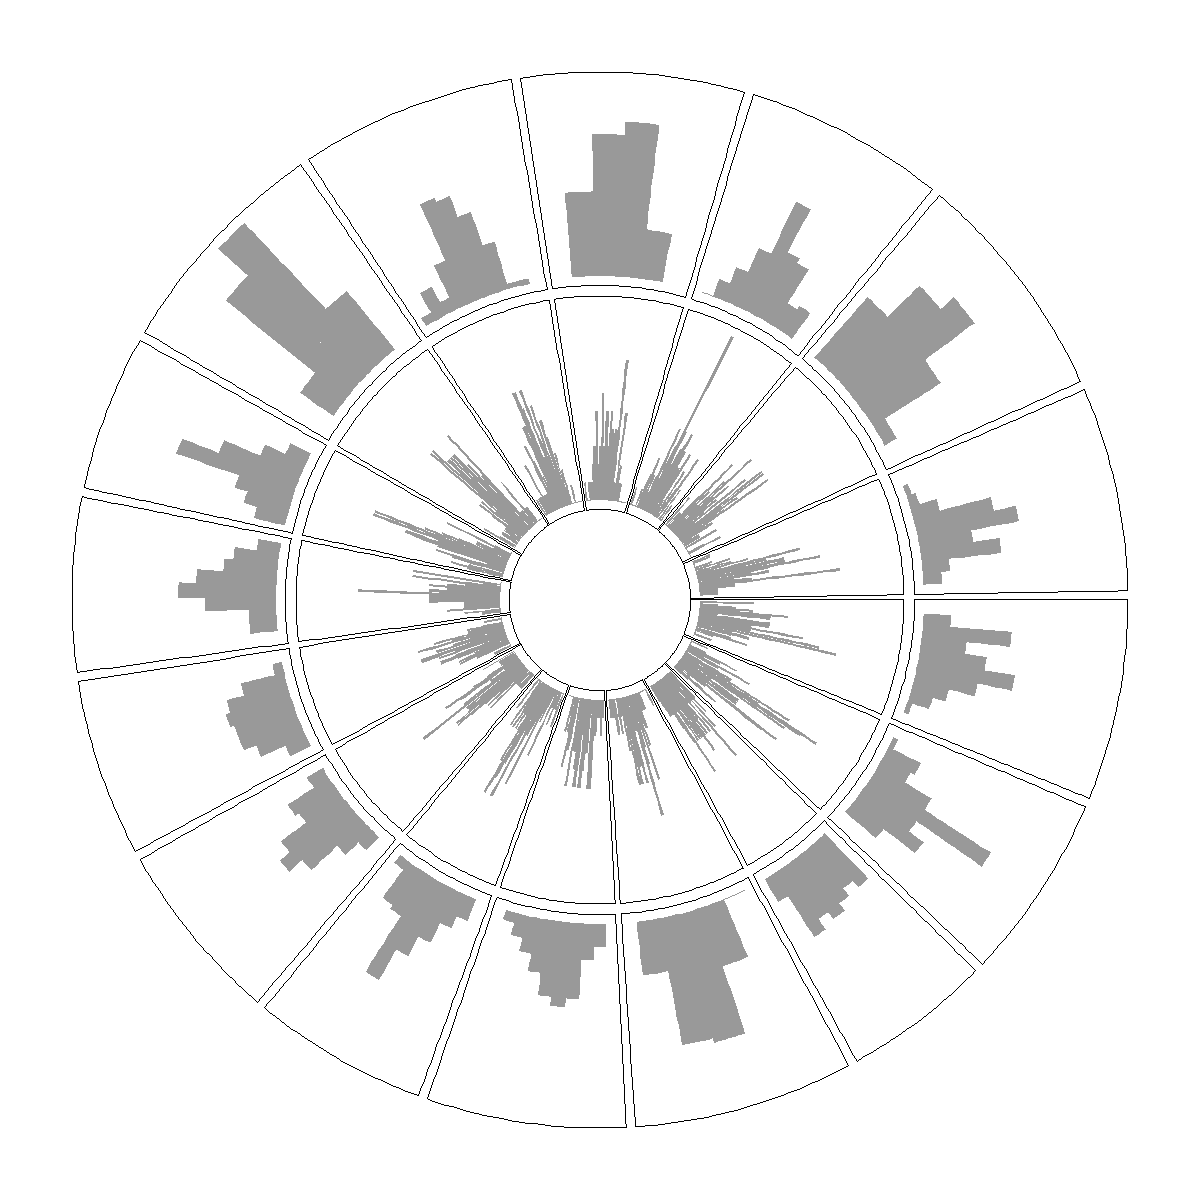

In [20]:
x = rnorm(1600)
factors = sample(letters[1:16], 1600, replace = TRUE)
circos.initialize(factors = factors, x = x)
circos.trackHist(factors = factors, x = x, col = "#999999", 
    border = "#999999")
circos.trackHist(factors = factors, x = x, bin.size = 0.1, 
    col = "#999999", border = "#999999")
circos.trackHist(factors = factors, x = x, draw.density = TRUE, 
    col = "#999999", border = "#999999")

-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 2.2.1     v purrr   0.2.4
v tibble  1.4.1     v dplyr   0.7.4
v tidyr   0.7.2     v stringr 1.2.0
v readr   1.1.1     v forcats 0.2.0
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
Warning message:
"Removed 12 rows containing missing values (position_stack)."Warning message:
"Removed 12 rows containing missing values (position_stack)."Warning message:
"Removed 12 rows containing missing values (geom_text)."

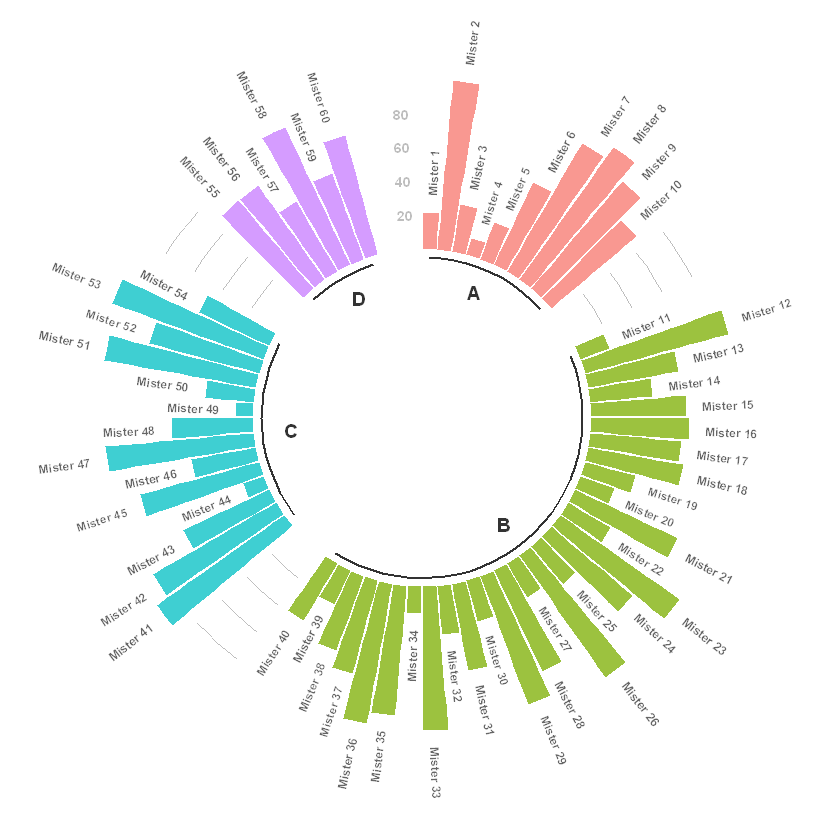

In [7]:
 
# library
library(tidyverse)
 
# Create dataset
data=data.frame(
  individual=paste( "Mister ", seq(1,60), sep=""),
  group=c( rep('A', 10), rep('B', 30), rep('C', 14), rep('D', 6)) ,
  value=sample( seq(10,100), 60, replace=T)
)
 
# Set a number of 'empty bar' to add at the end of each group
empty_bar=3
to_add = data.frame( matrix(NA, empty_bar*nlevels(data$group), ncol(data)) )
colnames(to_add) = colnames(data)
to_add$group=rep(levels(data$group), each=empty_bar)
data=rbind(data, to_add)
data=data %>% arrange(group)
data$id=seq(1, nrow(data))
 
# Get the name and the y position of each label
label_data=data
number_of_bar=nrow(label_data)
angle= 90 - 360 * (label_data$id-0.5) /number_of_bar     # I substract 0.5 because the letter must have the angle of the center of the bars. Not extreme right(1) or extreme left (0)
label_data$hjust<-ifelse( angle < -90, 1, 0)
label_data$angle<-ifelse(angle < -90, angle+180, angle)
 
# prepare a data frame for base lines
base_data=data %>% 
  group_by(group) %>% 
  summarize(start=min(id), end=max(id) - empty_bar) %>% 
  rowwise() %>% 
  mutate(title=mean(c(start, end)))
 
# prepare a data frame for grid (scales)
grid_data = base_data
grid_data$end = grid_data$end[ c( nrow(grid_data), 1:nrow(grid_data)-1)] + 1
grid_data$start = grid_data$start - 1
grid_data=grid_data[-1,]
 
# Make the plot
p = ggplot(data, aes(x=as.factor(id), y=value, fill=group)) +       # Note that id is a factor. If x is numeric, there is some space between the first bar
  
  geom_bar(aes(x=as.factor(id), y=value, fill=group), stat="identity", alpha=0.5) +
  
  # Add a val=100/75/50/25 lines. I do it at the beginning to make sur barplots are OVER it.
  geom_segment(data=grid_data, aes(x = end, y = 80, xend = start, yend = 80), colour = "grey", alpha=1, size=0.3 , inherit.aes = FALSE ) +
  geom_segment(data=grid_data, aes(x = end, y = 60, xend = start, yend = 60), colour = "grey", alpha=1, size=0.3 , inherit.aes = FALSE ) +
  geom_segment(data=grid_data, aes(x = end, y = 40, xend = start, yend = 40), colour = "grey", alpha=1, size=0.3 , inherit.aes = FALSE ) +
  geom_segment(data=grid_data, aes(x = end, y = 20, xend = start, yend = 20), colour = "grey", alpha=1, size=0.3 , inherit.aes = FALSE ) +
  
  # Add text showing the value of each 100/75/50/25 lines
  annotate("text", x = rep(max(data$id),4), y = c(20, 40, 60, 80), label = c("20", "40", "60", "80") , color="grey", size=3 , angle=0, fontface="bold", hjust=1) +
  
  geom_bar(aes(x=as.factor(id), y=value, fill=group), stat="identity", alpha=0.5) +
  ylim(-100,120) +
  theme_minimal() +
  theme(
    legend.position = "none",
    axis.text = element_blank(),
    axis.title = element_blank(),
    panel.grid = element_blank(),
    plot.margin = unit(rep(-1,4), "cm") 
  ) +
  coord_polar() + 
  geom_text(data=label_data, aes(x=id, y=value+10, label=individual, hjust=hjust), color="black", fontface="bold",alpha=0.6, size=2.5, angle= label_data$angle, inherit.aes = FALSE ) +
  
  # Add base line information
  geom_segment(data=base_data, aes(x = start, y = -5, xend = end, yend = -5), colour = "black", alpha=0.8, size=0.6 , inherit.aes = FALSE )  +
  geom_text(data=base_data, aes(x = title, y = -18, label=group), hjust=c(1,1,0,0), colour = "black", alpha=0.8, size=4, fontface="bold", inherit.aes = FALSE)
 
p

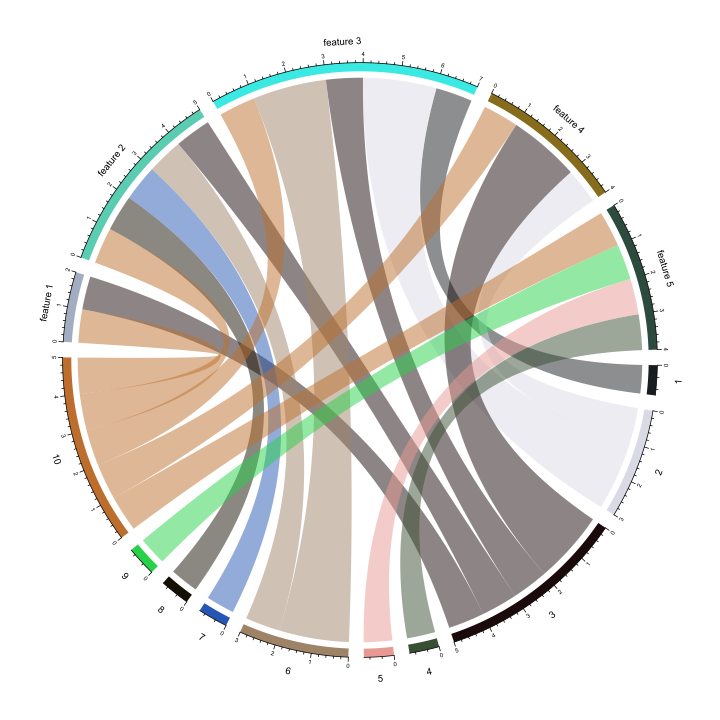

In [13]:
options(repr.plot.width = 10, repr.plot.height = 10)
#options(jupyter.plot_mimetypes = "image/png") 
options(jupyter.plot_mimetypes = "image/svg+xml") 

#Create data
name=c(3,10,10,3,6,7,8,3,6,1,2,2,6,10,2,3,3,10,4,5,9,10)
feature=paste("feature ", c(1,1,2,2,2,2,2,3,3,3,3,3,3,3,4,4,4,4,5,5,5,5) , sep="")
dat <- data.frame(name,feature)
dat <- with(dat, table(name, feature))
 
# Charge the circlize library
library(circlize)
 
# Make the circular plot
chordDiagram(as.data.frame(dat), transparency = 0.5)